# Natural Language Processing

### Natural Language Processing refers to computer understanding and manipulation of human language.

![title](Nlp.png)

### If you have Windows or IOS then you have probably NLP in front of you!

### Cortana and Siri are applications that take what you say and turn it to something meaningful that can be done programmatically.

![title](Siri.png)
![title](Cortana.jpg)

# NLP Applications

* ## Spam detection

* ## POS (parts-of-speech) tagging

* ## NER (named-entity recognition)

* ## Sentiment analysis

* ## Machine translation

* ## Information extraction

* ## Machine conversations

In [6]:
import numpy as np
import pandas as pd
import nltk


In [7]:
data_all = pd.read_csv('/Users/javadzabihi/movie_data.csv', encoding='utf-8')
data_all.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [8]:
example = data_all.loc[0, 'review'][:160]

In [9]:
example

'My family and I normally do not watch local movies for the simple reason that they are poorly made, they lack the depth, and just not worth our time.<br /><br /'

# How to install nltk 

* ## sudo pip install nltk
* ## import nltk
* ## nltk.download()
![title](nltk installation.jpg)

# POS tagging

In [10]:
nltk.pos_tag('NLP is great'.split())

[('NLP', 'NNP'), ('is', 'VBZ'), ('great', 'JJ')]

# NER (Named Entity Recognition)

In [11]:
sentence = 'Elon Musk is the CEO of Tesla Motors.'

In [12]:
tags = nltk.pos_tag(sentence.split())
tags

[('Elon', 'NNP'),
 ('Musk', 'NNP'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('CEO', 'NN'),
 ('of', 'IN'),
 ('Tesla', 'NNP'),
 ('Motors.', 'NNP')]

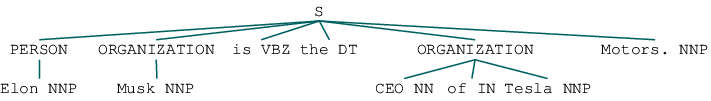

In [13]:
nltk.ne_chunk(tags)

# Tokenization

* ## Input is a string.

* ## String contains a sentence (or a few).

* ## Sentences are sequences of words.

In [14]:
from nltk.tokenize import word_tokenize

word_tokenize(example)


['My',
 'family',
 'and',
 'I',
 'normally',
 'do',
 'not',
 'watch',
 'local',
 'movies',
 'for',
 'the',
 'simple',
 'reason',
 'that',
 'they',
 'are',
 'poorly',
 'made',
 ',',
 'they',
 'lack',
 'the',
 'depth',
 ',',
 'and',
 'just',
 'not',
 'worth',
 'our',
 'time.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/']

# Stemming versus Lemmatization

* ### Both reduce words to a 'root' form.
* ### Useful because vocabularies can get too large easily.
* ### Lemmatization is a more advanced way, and can take POS into account.

In [15]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [16]:
port = PorterStemmer()

print (port.stem('meeting'))
print (port.stem('better'))
print (port.stem('is'))
print (port.stem('funnier'))
print (port.stem('made'))
print (port.stem('fantasized'))



meet
better
is
funnier
made
fantas


In [17]:
wordlemma = WordNetLemmatizer()


print (wordlemma.lemmatize('meeting',pos='n'))
print (wordlemma.lemmatize('meeting',pos='v'))
print (wordlemma.lemmatize('better',pos='a'))
print (wordlemma.lemmatize('is',pos='v'))
print (wordlemma.lemmatize('funnier',pos='a'))
print (wordlemma.lemmatize('made',pos='v'))
print (wordlemma.lemmatize('fantasized',pos='v'))



meeting
meet
good
be
funny
make
fantasize


# Stopwords removal

In [18]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print ("------List of stop words-------")
for s in stop_words:
    print (s)

------List of stop words-------
i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't


In [19]:
print ("--------Customized stopword removal---------")
print (" ".join(word for word in example.split() if word not in stop_words))

--------Customized stopword removal---------
My family I normally watch local movies simple reason poorly made, lack depth, worth time.<br /><br /


# Regular expressions

* ### Deal with HTML and XML markup

* ### Emoticons

In [20]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [21]:
preprocessor(example)

'my family and i normally do not watch local movies for the simple reason that they are poorly made they lack the depth and just not worth our time br '

# Processing documents into tokens

In [22]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [23]:
tokenizer(example)

['My',
 'family',
 'and',
 'I',
 'normally',
 'do',
 'not',
 'watch',
 'local',
 'movies',
 'for',
 'the',
 'simple',
 'reason',
 'that',
 'they',
 'are',
 'poorly',
 'made,',
 'they',
 'lack',
 'the',
 'depth,',
 'and',
 'just',
 'not',
 'worth',
 'our',
 'time.<br',
 '/><br',
 '/']

In [24]:
tokenizer_porter(example)

['My',
 'famili',
 'and',
 'I',
 'normal',
 'do',
 'not',
 'watch',
 'local',
 'movi',
 'for',
 'the',
 'simpl',
 'reason',
 'that',
 'they',
 'are',
 'poorli',
 'made,',
 'they',
 'lack',
 'the',
 'depth,',
 'and',
 'just',
 'not',
 'worth',
 'our',
 'time.<br',
 '/><br',
 '/']

# Transforming documents into feature vectors

### By calling the fit_transform method on CountVectorizer, we constructed the vocabulary of the bag-of-words model and transformed the following three sentences into sparse feature vectors:

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

docs = np.array([
        'I cannot make you understand',
        'I cannot make anyone understand what is happening inside me',
        'I cannot even explain it to myself'])

count = CountVectorizer()

bag = count.fit_transform(docs)


### The vocabularies are stored in a Python dictionary:

In [26]:
print(count.vocabulary_)

{'cannot': 1, 'make': 8, 'you': 14, 'understand': 12, 'anyone': 0, 'what': 13, 'is': 6, 'happening': 4, 'inside': 5, 'me': 9, 'even': 2, 'explain': 3, 'it': 7, 'to': 11, 'myself': 10}


Each index position in the feature vectors shown here corresponds to the integer values 
that are stored as dictionary items in the CountVectorizer vocabulary. For example, 
the first feature at index position 0 resembles the count of the word 'anyone', which only occurs in the second document, and the word 'cannot at index position 1 (the 2nd feature in the document vectors) occurs in all three sentences. Those values in the feature vectors 
are also called the raw term frequencies: tf (t,d)—the number of times a term 't' occurs 
in a document 'd'.

In [27]:
print(bag.toarray())

[[0 1 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 1 0 0 1 1 1 0 1 1 0 0 1 1 0]
 [0 1 1 1 0 0 0 1 0 0 1 1 0 0 0]]


# Term Frequency-Inverse Document Frequency

### When we are dealing with text data, we often encounter words that occur across multiple documents. Those frequently occurring words typically don't contain useful information. So, we can use a technique called term frequency-inverse document frequency (tf-idf) that can downweight those frequently occurring words in the feature vectors. The tf-idf can be calculated as the product of the term frequency and the inverse document frequency.

$$\text{tf-idf}(t,d)=\text{tf (t,d)}\times \text{idf}(t,d)$$

$$\text{idf} (t,d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}$$

$n_d$ : the total number of documents 

df(d, t) : the number of documents 'd' that contain the term 't'

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True, 
                         norm='l2', 
                         smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(docs))
      .toarray())

[[0.         0.37311881 0.         0.         0.         0.
  0.         0.         0.4804584  0.         0.         0.
  0.4804584  0.         0.63174505]
 [0.36501149 0.21558166 0.         0.         0.36501149 0.36501149
  0.36501149 0.         0.27760064 0.36501149 0.         0.
  0.27760064 0.36501149 0.        ]
 [0.         0.2553736  0.43238509 0.43238509 0.         0.
  0.         0.43238509 0.         0.         0.43238509 0.43238509
  0.         0.         0.        ]]


# Sentiment Analysis

### Sentiment analysis is the detection of attitudes.

* #### Is the attitude of this text positive, negative, or neutral?

![title](Sentiment.jpg)


In [29]:
### I'm choosing a very small subset of the dataset to speed up the run
X = data_all.loc[:500,'review']
y = data_all.loc[:500,'sentiment']


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

### We will use a GridSearchCV object to find the optimal set of parameters for our logistic regression model.

#### "TfidfVectorizer" combines the task of CountVectorizer and "TfidfTransformer".

# Logistic Regression

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop_words, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop_words, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [32]:
gs_lr_tfidf.fit(X_train, y_train)
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)

# The "best_score_" attribute returns the average score over the k-folds of the best model.
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.1min finished


Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x1a25c7ed08>} 
CV Accuracy: 0.743
Test Accuracy: 0.733


The best grid search results using Porter stemming instead of the regular tokenizer, 
no stop-word library, and a logistic regression classifier 
that uses L2-regularization with the regularization strength C of 10.0
based of raw term frequencies.
Regularization strengths is defined by the inverse-regularization parameter C.


The "gs_lr_tfidf.best_score_" is the average k-fold cross-validation score. For instance, if we have a GridSearchCV object with 10-fold cross-validation, the "best_score_" attribute returns the average score over the 10-folds of the best model. 

# Support Vector Classifier

In [33]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [None],
               'vect__tokenizer': [tokenizer_porter],
               'clf__gamma': [0.01, 0.1, 1],
               'clf__C': [0.01, 0.1, 1.0],
               'clf__kernel': ['linear', 'rbf']}]

svc_tfidf = Pipeline([('vect', tfidf), 
                      ('clf', SVC(random_state=1))])

gs_svc_tfidf = GridSearchCV(svc_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)


In [34]:
gs_svc_tfidf.fit(X_train, y_train)
print('Best parameter set: %s ' % gs_svc_tfidf.best_params_)

# The "best_score_" attribute returns the average score over the k-folds of the best model.
print('CV Accuracy: %.3f' % gs_svc_tfidf.best_score_)

clf = gs_svc_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.3min finished


Best parameter set: {'clf__C': 1.0, 'clf__gamma': 0.01, 'clf__kernel': 'linear', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x1a25c7ed08>} 
CV Accuracy: 0.733
Test Accuracy: 0.723


The best grid search results using the following values in the support vector classifier:

C = 1.0

gamma = 0.01

kernel = linear

# Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                       stop_words=None,
                       tokenizer=tokenizer_porter)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


clf = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred)

0.7128712871287128